In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Runs in about 70s
sim = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 120000, 0, 0, 8000)),
    time_step=0.1,
    steps=1000
)

print(type(sim))

Running simulation with Two-step Adams-Bashforth integrator


100%|██████████| 1000/1000 [00:00<00:00, 18560.84it/s]

Ran 1000 iterations at time step of 0.1 seconds
Simulation finished in 0.05625 seconds
<class 'deorbit.simulator.simulator.AdamsBashforthSimulator'>


In [11]:
save_path = sim.save_data("eg/", format="pkl")

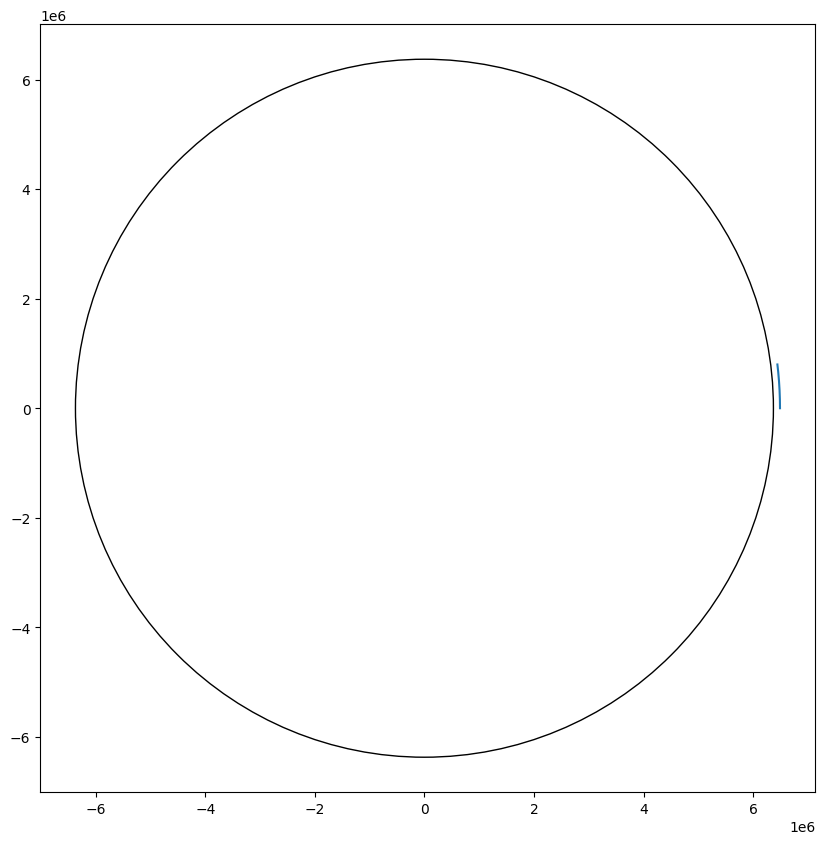

In [4]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
states = np.array(sim.states)
ax.plot(states[:, 0], states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax.add_patch(earth)
ax.axis("scaled")
plt.show()

In [12]:
from deorbit.utils import dataio
from deorbit.data_models.sim import SimConfig

io = dataio.PickleIO()
config: SimConfig = io.load(save_path / "config.pkl")
config.atmosphere_model_kwargs.atmos_name

'coesa_atmos_fast'